<a href="https://colab.research.google.com/github/Penpitcha0634/BSC_DPDM23/blob/main/MIDTERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm_BscDPDM

Midterm_BscDPDM23 (นางสาวเพ็ญพิชชา วรรณ์ชูมาตร์  643020063-4)

คำสั่ง ->
เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)

ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)
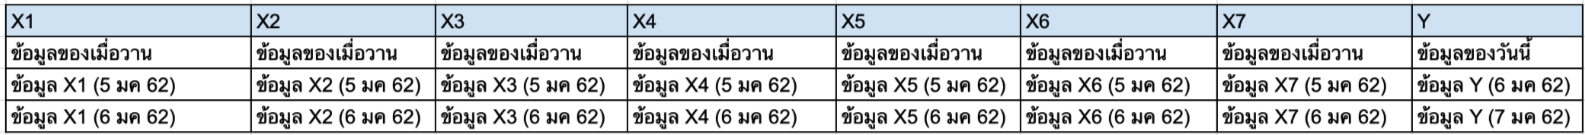



## import

In [2136]:
import pandas as pd

In [2137]:
import numpy as np

##เชื่อม Drive

In [2138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Meteorology = อุตุนิยมวิทยา (Met)

Atmospheric pressure = ความกดอากาศ (AtP) หน่วย %

Relative Humidity = ความชื้นสัมพัทธ์ (ReH) หน่วย %

Wind Speed = ความเร็วลม (Wind) หน่วย นอต

Cloud Amount = จำนวนเมฆ (Cloud) หน่วย 10 ส่วน

Rainfall = ปริมาณฝน (Rain) หน่วย มิลิเมตร

Dew point temperature = อุณหภูมิจุดน้ำค้าง (DewT) หน่วย เซลเซียส

lowest temperature = อุณหภูมิต่ำสุด (LowT) หน่วย เซลเซียส

Dry Bulb temperature = อุณหภูมิตุ้มแห้ง (DBT) หน่วย เซลเซียส

Khon Kaen = ขอนแก่น (KK)

์Nakhon Phanom = นครพนม (NP)

Loei = เลย (L)

Sakon Nakhon = สกลนคร (SN)

Nong Khai = หนองคาย (์NK)

Half way = ครึ่งทาง (H)

## เรียกข้อมูลความกดอากาศ (Atmospheric : AtP) ออกมากทั้ง 5 จังหวัด

###ขอนแก่น

In [2139]:
AtP_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
AtP_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


####เปลี่ยนชื่อ column

In [2140]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2141]:
AtP_KK = AtP_KK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2142]:
AtP_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


####ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2143]:
AtP_KK = AtP_KK.replace('-',np.NaN)

In [2144]:
AtP_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

พบว่ามี Missing อยู่ในวันที่ 29 30 31 อาจจะเป็นเพราะว่า แต่ละเดือนนั้นมีจำนวนวันไม่เท่ากัน เราจะทำการแก้ไข Missing โดยการเติมค่าเฉลี่ยลงไป

####แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2145]:
for i in range(len(AtP_KK['ที่'])):AtP_KK.iloc[i,:]=AtP_KK.iloc[i,:].fillna(AtP_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2146]:
AtP_KK.isnull().any() #ตรวจ Missing ซ้ำอีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

แก้ Missing แล้วตรวจสอบซ้ำพบว่าไม่มี Missing แล้วแสดงว่าตารางใช้งานได้แล้ว

In [2147]:
AtP_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667


###นครพนม

In [2148]:
AtP_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
AtP_NP.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


####เปลี่ยนชื่อ column

In [2149]:
AtP_NP = AtP_NP.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2150]:
AtP_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


####ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2151]:
AtP_NP = AtP_NP.replace('-',np.NaN)

In [2152]:
AtP_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

พบว่ามี Missing อยู่ในวันที่ 29 30 31 อาจจะเป็นเพราะว่า แต่ละเดือนนั้นมีจำนวนวันไม่เท่ากัน เราจะทำการแก้ไข Missing โดยการเติมค่าเฉลี่ยลงไป

####แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2153]:
for i in range(len(AtP_NP['ที่'])):AtP_NP.iloc[i,:]=AtP_NP.iloc[i,:].fillna(AtP_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2154]:
AtP_NP.isnull().any() #ตรวจ Missing ซ้ำอีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

แก้ Missing แล้วตรวจสอบซ้ำพบว่าไม่มี Missing แล้วแสดงว่าตารางใช้งานได้แล้ว

In [2155]:
AtP_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.280000,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.60,1011.13,1012.184667,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.730000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.500000,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,1010.608000,1010.608000


###สกลนคร

In [2156]:
AtP_SN = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
AtP_SN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


####เปลี่ยนชื่อ column

In [2157]:
AtP_SN = AtP_SN.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2158]:
AtP_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


####ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2159]:
AtP_SN = AtP_SN.replace('-',np.NaN)

In [2160]:
AtP_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

พบว่ามี Missing อยู่ในวันที่ 29 30 31 อาจจะเป็นเพราะว่า แต่ละเดือนนั้นมีจำนวนวันไม่เท่ากัน เราจะทำการแก้ไข Missing โดยการเติมค่าเฉลี่ยลงไป

####แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2161]:
for i in range(len(AtP_SN['ที่'])):AtP_SN.iloc[i,:]=AtP_SN.iloc[i,:].fillna(AtP_SN.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2162]:
AtP_SN.isnull().any() #ตรวจ Missing ซ้ำอีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

แก้ Missing แล้วตรวจสอบซ้ำพบว่าไม่มี Missing แล้วแสดงว่าตารางใช้งานได้แล้ว

In [2163]:
AtP_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.210,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,1012.255,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.80,1016.96,1017.630,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.520,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,1010.554,1010.554000


###หนองคาย

In [2164]:
AtP_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
AtP_NK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


####เปลี่ยนชื่อ column

In [2165]:
AtP_NK = AtP_NK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2166]:
AtP_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


####ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2167]:
AtP_NK = AtP_NK.replace('-',np.NaN)

In [2168]:
AtP_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

พบว่ามี Missing อยู่ในวันที่ 29 30 31 อาจจะเป็นเพราะว่า แต่ละเดือนนั้นมีจำนวนวันไม่เท่ากัน เราจะทำการแก้ไข Missing โดยการเติมค่าเฉลี่ยลงไป

####แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2169]:
for i in range(len(AtP_NK['ที่'])):AtP_NK.iloc[i,:]=AtP_NK.iloc[i,:].fillna(AtP_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2170]:
AtP_NK.isnull().any() #ตรวจ Missing ซ้ำอีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

แก้ Missing แล้วตรวจสอบซ้ำพบว่าไม่มี Missing แล้วแสดงว่าตารางใช้งานได้แล้ว



In [2171]:
AtP_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.180000,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.10,1012.332333,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.190000,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.380000,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.10,1010.214667,1010.214667


###เลย

In [2172]:
AtP_L = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)
AtP_L.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


####เปลี่ยนชื่อ column

In [2173]:
AtP_L = AtP_L.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2174]:
AtP_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


####ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2175]:
AtP_L = AtP_L.replace('-',np.NaN)

In [2176]:
AtP_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

พบว่ามี Missing อยู่ในวันที่ 29 30 31 อาจจะเป็นเพราะว่า แต่ละเดือนนั้นมีจำนวนวันไม่เท่ากัน เราจะทำการแก้ไข Missing โดยการเติมค่าเฉลี่ยลงไป

####แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2177]:
for i in range(len(AtP_L['ที่'])):AtP_L.iloc[i,:]=AtP_L.iloc[i,:].fillna(AtP_L.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2178]:
AtP_L.isnull().any() #ตรวจ Missing ซ้ำอีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

แก้ Missing แล้วตรวจสอบซ้ำพบว่าไม่มี Missing แล้วแสดงว่าตารางใช้งานได้แล้ว

In [2179]:
AtP_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.710000,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.10,1010.43,1012.078333,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.620000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.400000,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,1009.516667,1009.516667


## เรียกข้อมูลความชื้อสัมพัทธ์ (Relative Humidity : ReH) ออกมากทั้ง 5 จังหวัด

###ขอนแก่น

In [2180]:
ReH_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
ReH_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


####เปลี่ยนชื่อ column

In [2181]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2182]:
ReH_KK = ReH_KK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2183]:
ReH_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


####ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2184]:
ReH_KK = ReH_KK.replace('-',np.NaN)

In [2185]:
ReH_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

พบว่ามี Missing อยู่ในวันที่ 29 30 31 อาจจะเป็นเพราะว่า แต่ละเดือนนั้นมีจำนวนวันไม่เท่ากัน เราจะทำการแก้ไข Missing โดยการเติมค่าเฉลี่ยลงไป

####แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2186]:
for i in range(len(ReH_KK['ที่'])):ReH_KK.iloc[i,:]=ReH_KK.iloc[i,:].fillna(ReH_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2187]:
ReH_KK.isnull().any() #ตรวจ Missing ซ้ำอีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

แก้ Missing แล้วตรวจสอบซ้ำพบว่าไม่มี Missing แล้วแสดงว่าตารางใช้งานได้แล้ว

In [2188]:
ReH_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,68.0,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,65.0,65.0,65


###นครพนม

In [2189]:
ReH_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
ReH_NP.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


####เปลี่ยนชื่อ colmn

In [2190]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2191]:
ReH_NP = ReH_NP.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2192]:
ReH_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2193]:
ReH_NP = ReH_NP.replace('-',np.NaN)

In [2194]:
ReH_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2195]:
for i in range(len(ReH_NP['ที่'])):ReH_NP.iloc[i,:]=ReH_NP.iloc[i,:].fillna(ReH_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2196]:
ReH_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2197]:
ReH_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72.0,70.0,69.0,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66.0,65.0,69.0,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63.0,66.0,70.0,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61.0,59.0,62.0,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69.0,65.0,65.0,65


###สกลนคร

In [2198]:
ReH_SN = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
ReH_SN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


#### เปลี่ยนชื่อ column

In [2199]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2200]:
ReH_SN = ReH_SN.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2201]:
ReH_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2202]:
ReH_SN = ReH_SN.replace('-',np.NaN)

In [2203]:
ReH_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2204]:
for i in range(len(ReH_SN['ที่'])):ReH_SN.iloc[i,:]=ReH_SN.iloc[i,:].fillna(ReH_SN.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2205]:
ReH_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2206]:
ReH_SN.head() #เรียกตารางออกมาดู

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74.0,73.0,72.0,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69.0,69.0,70.0,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69.0,69.0,68.0,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64.0,64.0,62.0,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71.0,64.0,64.0,64


### หนองคาย

In [2207]:
ReH_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
ReH_NK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


#### เปลี่ยนชื่อ column

In [2208]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2209]:
ReH_NK = ReH_NK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2210]:
ReH_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2211]:
ReH_NK = ReH_NK.replace('-',np.NaN)

In [2212]:
ReH_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2213]:
for i in range(len(ReH_NK['ที่'])):ReH_NK.iloc[i,:]=ReH_NK.iloc[i,:].fillna(ReH_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2214]:
ReH_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2215]:
ReH_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70.0,66.0,68.0,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71.0,69.0,68.0,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70.0,67.0,68.0,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65.0,68.0,73.0,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69.0,69.0,69.0,69


### เลย


In [2216]:
ReH_L = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)
ReH_L.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


#### เปลี่ยนชื่อ column

In [2217]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2218]:
ReH_L = ReH_L.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2219]:
ReH_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2220]:
ReH_L = ReH_L.replace('-',np.NaN)

In [2221]:
ReH_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2222]:
for i in range(len(ReH_L['ที่'])):ReH_L.iloc[i,:]=ReH_L.iloc[i,:].fillna(ReH_L.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2223]:
ReH_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2224]:
ReH_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82.0,83.0,85.0,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82.0,79.0,82.0,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78.0,81.0,78.0,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77.0,82.0,79.0,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70.0,73.0,73.0,73


## เรียกข้อมูลความเร็วลม (Wind Speed : Wind) ออกมาทั้ง 5 จังหวัด

###ขอนแก่น

In [2225]:
Wind_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความเร็วลม (นอต)/จ.ขอนแก่น.xlsx',header=4)
Wind_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


####เปลี่ยนชื่อ Column

In [2226]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2227]:
Wind_KK = Wind_KK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2228]:
Wind_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


####ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2229]:
Wind_KK = Wind_KK.replace('-',np.NaN)

In [2230]:
Wind_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3              True
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing ด้วยการแทนด้วยค่าเฉลี่ย

In [2231]:
for i in range(len(Wind_KK['ที่'])):Wind_KK.iloc[i,:]=Wind_KK.iloc[i,:].fillna(Wind_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2232]:
Wind_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2233]:
Wind_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3.0,2,2,3,4,...,2,3,5,5,5,4,6.0,4.0,5.000000,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3.0,3,5,2,3,...,7,6,5,5,3,1,3.0,3.0,3.466667,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4.0,4,4,4,4,...,5,6,7,6,5,4,4.0,6.0,5.000000,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1.0,4,4,2,4,...,3,3,4,2,2,1,3.0,4.0,4.000000,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3.0,2,3,1,2,...,1,2,3,2,4,3,3.0,3.0,2.566667,2.566667


###นครพนม

In [2234]:
Wind_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความเร็วลม (นอต)/จ.นครพนม.xlsx',header=4)
Wind_NP.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


####เปลี่ยนชื่อ Column

In [2235]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2236]:
Wind_NP = Wind_NP.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2237]:
Wind_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2238]:
Wind_NP = Wind_NP.replace('-',np.NaN)

In [2239]:
Wind_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5              True
6             False
7              True
8              True
9             False
10             True
11             True
12             True
13            False
14            False
15             True
16             True
17            False
18             True
19            False
20             True
21             True
22             True
23            False
24             True
25             True
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2240]:
for i in range(len(Wind_NP['ที่'])):Wind_NP.iloc[i,:]=Wind_NP.iloc[i,:].fillna(Wind_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2241]:
Wind_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2242]:
Wind_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1.0,0,2.0,...,1,2.0,2.0,1,2,2.0,1.0,1.0,1.0,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1.0,1,1.0,...,3,3.0,2.0,2,1,1.0,1.0,1.0,1.2,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1.0,1,1.0,...,1,3.0,3.0,1,2,1.0,1.0,2.0,2.0,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,2.0,3,3.0,...,4,1.0,5.0,1,1,1.0,4.0,5.0,4.0,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0.0,0.0,1,1.0,...,1,2.0,2.0,3,3,3.0,1.0,2.0,2.2,2.200000


###สกลนคร

In [2243]:
Wind_SN = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความเร็วลม (นอต)/จ.สกลนคร.xlsx',header=4)
Wind_SN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


#### เปลี่ยนชื่อ Column

In [2244]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2245]:
Wind_SN = Wind_SN.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2246]:
Wind_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2247]:
Wind_SN = Wind_SN.replace('-',np.NaN)

In [2248]:
Wind_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20             True
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2249]:
for i in range(len(Wind_SN['ที่'])):Wind_SN.iloc[i,:]=Wind_SN.iloc[i,:].fillna(Wind_SN.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2250]:
Wind_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2251]:
Wind_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1,0,2,...,1,2,2,1,2,2,1.0,1.0,1.000000,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1,1,1,...,3,3,2,2,1,1,1.0,1.0,1.200000,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1,1,1,...,1,3,3,1,2,1,1.0,2.0,2.000000,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


###หนองคาย

In [2252]:
Wind_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความเร็วลม (นอต)/จ.หนองคาย.xlsx',header=4)
Wind_NK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


#### เปลี่ยนชื่อ column

In [2253]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2254]:
Wind_NK = Wind_NK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2255]:
Wind_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2256]:
Wind_NK = Wind_NK.replace('-',np.NaN)

In [2257]:
Wind_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2258]:
for i in range(len(Wind_NK['ที่'])):Wind_NK.iloc[i,:]=Wind_NK.iloc[i,:].fillna(Wind_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2259]:
Wind_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2260]:
Wind_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2.0,1,3,1,...,2,2,3,3,3,3,3.0,3.0,4.000000,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2.0,2,1,2,...,7,4,2,3,2,2,2.0,2.0,2.433333,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2.0,2,2,2,...,3,6,5,4,2,2,2.0,3.0,2.000000,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


###เลย

In [2261]:
Wind_L = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ความเร็วลม (นอต)/จ.เลย.xlsx',header=4)
Wind_L.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


#### เปลี่ยนชื่อ column

In [2262]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2263]:
Wind_L = Wind_L.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2264]:
Wind_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2265]:
Wind_L = Wind_L.replace('-',np.NaN)

In [2266]:
Wind_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5              True
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16             True
17            False
18            False
19             True
20            False
21            False
22            False
23            False
24             True
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2267]:
for i in range(len(Wind_L['ที่'])):Wind_L.iloc[i,:]=Wind_L.iloc[i,:].fillna(Wind_L.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2268]:
Wind_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2269]:
Wind_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3.0,2,1,...,1,1.0,2,2,1,2,2.0,2.0,1.0,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2.0,2,2,...,3,2.0,1,1,2,1,2.0,1.0,1.7,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1.0,2,1,...,1,2.0,3,2,1,2,1.0,2.0,2.0,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2.0,2,2,...,2,1.0,3,2,2,2,2.0,1.0,1.0,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1.0,2,1,...,1,1.0,1,1,3,4,2.0,1.0,1.7,1.700000


## เรียกข้อมูลจำนวนเมฆ  (Cloud Amount : Cloud) ออกมาทั้ง 5 จังหวัด

###ขอนแก่น

In [2270]:
Cloud_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/จำนวนเมฆ (10 ส่วน)/จ.ขอนแก่น.xlsx',header=4)
Cloud_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


#### เปลี่ยนชื่อ column

In [2271]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2272]:
Cloud_KK = Cloud_KK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2273]:
Cloud_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2274]:
Cloud_KK = Cloud_KK.replace('-',np.NaN)

In [2275]:
Cloud_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3              True
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2276]:
for i in range(len(Cloud_KK['ที่'])):Cloud_KK.iloc[i,:]=Cloud_KK.iloc[i,:].fillna(Cloud_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2277]:
Cloud_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2278]:
Cloud_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10.0,8,10,10,10,...,2,3,5,3,3,5,4.0,2.0,2.000000,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2.0,2,3,6,9,...,6,6,3,2,2,1,3.0,2.0,3.533333,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4.0,4,5,8,7,...,5,5,3,3,1,2,1.0,1.0,1.000000,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7.0,6,3,1,3,...,6,4,4,3,2,5,6.0,10.0,10.000000,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8.0,8,3,3,1,...,1,2,0,1,4,5,1.0,2.0,2.533333,2.533333


###นครพนม

In [2279]:
Cloud_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/จำนวนเมฆ (10 ส่วน)/จ.นครพนม.xlsx',header=4)
Cloud_NP.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


#### เปลี่ยนชื่อ column

In [2280]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2281]:
Cloud_NP = Cloud_NP.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2282]:
Cloud_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2283]:
Cloud_NP = Cloud_NP.replace('-',np.NaN)

In [2284]:
Cloud_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11            False
12            False
13             True
14             True
15             True
16            False
17            False
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26            False
27             True
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2285]:
for i in range(len(Cloud_NP['ที่'])):Cloud_NP.iloc[i,:]=Cloud_NP.iloc[i,:].fillna(Cloud_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2286]:
Cloud_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2287]:
Cloud_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,7.0,8.0,8.0,10.0,10.0,9.0,...,2.0,2.0,2.0,2,3.0,3,4.0,2.0,4.000000,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,2.0,2.0,3.0,5.0,7.0,9.0,...,4.0,4.0,4.0,2,2.0,2,1.0,1.0,3.066667,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2.0,2.0,2.0,4.0,4.0,7.0,8.0,...,4.0,2.0,2.0,2,2.0,1,2.0,1.0,1.000000,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,4.0,6.0,4.0,2.0,5.0,...,5.0,3.0,2.0,2,2.0,3,3.0,6.0,5.000000,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5.0,5.0,8.0,7.0,3.0,3.0,2.0,...,2.0,2.0,2.0,3,7.0,6,2.0,1.0,2.966667,2.966667


###สกลนคร

In [2288]:
Cloud_SN = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/จำนวนเมฆ (10 ส่วน)/จ.สกลนคร.xlsx',header=4)
Cloud_SN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857


#### เปลี่ยนชื่อ column

In [2289]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2290]:
Cloud_SN = Cloud_SN.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2291]:
Cloud_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2292]:
Cloud_SN = Cloud_SN.replace('-',np.NaN)

In [2293]:
Cloud_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2294]:
for i in range(len(Cloud_SN['ที่'])):Cloud_SN.iloc[i,:]=Cloud_SN.iloc[i,:].fillna(Cloud_SN.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2295]:
Cloud_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2296]:
Cloud_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9.0,9.0,7.0,7.0,9.0,10.0,8.0,...,2.000000,1.000000,2.000000,1.0,1.0,3.0,3.0,1.0,4.000000,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,0.0,0.0,1.0,3.0,7.0,8.0,...,4.000000,3.000000,1.000000,1.0,1.0,1.0,1.0,0.0,2.300000,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,1.0,2.0,2.0,2.0,6.0,6.0,...,3.000000,2.000000,2.703704,0.0,0.0,0.0,0.0,1.0,2.703704,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0.0,0.0,4.0,3.0,2.0,0.0,1.0,...,4.000000,1.000000,0.000000,3.0,0.0,1.0,4.0,7.0,8.000000,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4.0,4.0,8.0,5.0,1.0,0.0,0.0,...,2.142857,2.142857,2.142857,1.0,6.0,4.0,0.0,0.0,2.142857,2.142857


###หนองคาย

In [2297]:
Cloud_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/จำนวนเมฆ (10 ส่วน)/จ.หนองคาย.xlsx',header=4)
Cloud_NK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571


#### เปลี่ยนชื่อ column

In [2298]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2299]:
Cloud_NK = Cloud_NK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2300]:
Cloud_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2301]:
Cloud_NK = Cloud_NK.replace('-',np.NaN)

In [2302]:
Cloud_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2303]:
for i in range(len(Cloud_NK['ที่'])):Cloud_NK.iloc[i,:]=Cloud_NK.iloc[i,:].fillna(Cloud_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2304]:
Cloud_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2305]:
Cloud_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,10.0,8.000000,9.0,9.0,10.000000,10.000000,...,3.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,4.000000,3.000000,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1.0,0.0,0.000000,1.0,1.0,2.000000,6.000000,...,6.000000,6.000000,2.571429,0.000000,1.0,2.0,4.0,2.000000,2.571429,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4.0,4.0,3.285714,2.0,7.0,5.000000,5.000000,...,2.000000,8.000000,1.000000,3.285714,3.0,1.0,1.0,3.000000,3.285714,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.000000,6.0,8.0,2.000000,3.000000,...,8.000000,5.000000,6.000000,6.000000,1.0,0.0,6.0,10.000000,9.000000,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7.0,8.0,10.000000,6.0,1.0,4.928571,4.928571,...,4.928571,4.928571,4.928571,4.928571,6.0,5.0,6.0,4.928571,4.928571,4.928571


###เลย

In [2306]:
Cloud_L = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/จำนวนเมฆ (10 ส่วน)/จ.เลย.xlsx',header=4)
Cloud_L.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### เปลี่ยนชื่อ column

In [2307]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2308]:
Cloud_L = Cloud_L.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2309]:
Cloud_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####ตัดตาราง Cloud_L ให้เหลือแค่ 35 Column แรก

In [2310]:
Cloud_L = Cloud_L.iloc[:,:35]
Cloud_L

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2.809524
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,4,4,6,7,6,...,2,2,2,2,2,2,1,3,6,3.000000
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,1,7,4,4,2,...,3,6,3,4,6,6,8,6,-,3.800000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3,3,6,6,3,6,4,...,6,2,6,8,4,2,1,4,2,3.032258
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,2,2,1,2,4,1,...,1,2,4,3,8,10,7,5,9,3.333333
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,6,8,6,3,1,2,0,...,4,0,1,2,2,3,8,6,3,3.000000


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2311]:
Cloud_L = Cloud_L.replace('-',np.NaN)

In [2312]:
Cloud_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2313]:
for i in range(len(Cloud_L['ที่'])):Cloud_L.iloc[i,:]=Cloud_L.iloc[i,:].fillna(Cloud_L.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2314]:
Cloud_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2315]:
Cloud_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.000000,...,1.000000,1.000000,2.000000,4.0,2.0,3.0,3.000000,1.0,2.000000,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.000000,...,6.000000,4.000000,0.000000,1.0,2.0,2.0,5.000000,3.0,2.333333,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.000000,...,3.000000,1.000000,1.000000,0.0,0.0,1.0,1.000000,4.0,1.000000,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.000000,...,2.000000,4.000000,6.000000,5.0,1.0,2.0,4.000000,9.0,8.000000,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,2.809524,...,2.809524,2.809524,2.809524,0.0,1.0,3.0,2.809524,3.0,2.809524,2.809524


## เรียกข้อมูลปริมาณฝน ( Rainfall : Rain) ออกมาทั้ง 5 จังหวัด

###ขอนแก่น

In [2316]:
Rain_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
Rain_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


#### เปลี่ยนชื่อ column

In [2317]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2318]:
Rain_KK = Rain_KK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2319]:
Rain_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2320]:
Rain_KK = Rain_KK.replace('-',np.NaN)

In [2321]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2322]:
for i in range(len(Rain_KK['ที่'])):Rain_KK.iloc[i,:]=Rain_KK.iloc[i,:].fillna(Rain_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2323]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2324]:
Rain_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0.0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,T,T


####แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [2325]:
Rain_KK = Rain_KK.replace('T',np.NaN)

In [2326]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2327]:
Rain_KK.fillna(0.1, inplace=True)

In [2328]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2329]:
Rain_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1


###นครพนม


In [2330]:
Rain_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
Rain_NP.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


#### เปลี่ยนชื่อ column

In [2331]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2332]:
Rain_NP = Rain_NP.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2333]:
Rain_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2334]:
Rain_NP = Rain_NP.replace('-',np.NaN)

In [2335]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2336]:
for i in range(len(Rain_NP['ที่'])):Rain_NP.iloc[i,:]=Rain_NP.iloc[i,:].fillna(Rain_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2337]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14            False
15             True
16             True
17             True
18             True
19            False
20             True
21            False
22             True
23             True
24            False
25             True
26            False
27            False
28            False
29            False
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2338]:
Rain_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0.0,0,0.0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0.0,0,0,T,T,0,...,0,0,0,0,0.5,0,0.0,0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,NaN
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0.0,0,0,0,0,0,...,2.3,0,0,0,0.0,0,0.0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,1.2,0,0.0,1.2,1.2,1.2


####แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [2339]:
Rain_NP = Rain_NP.replace('T',np.NaN)

In [2340]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2341]:
Rain_NP.fillna(0.1, inplace=True)

In [2342]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2343]:
Rain_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,1.2,1.2,1.2


###สกลนคร

In [2344]:
Rain_SN = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
Rain_SN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


#### เปลี่ยนชื่อ column

In [2345]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2346]:
Rain_SN = Rain_SN.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2347]:
Rain_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2348]:
Rain_SN = Rain_SN.replace('-',np.NaN)

In [2349]:
Rain_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2350]:
for i in range(len(Rain_SN['ที่'])):Rain_SN.iloc[i,:]=Rain_SN.iloc[i,:].fillna(Rain_SN.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2351]:
Rain_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2352]:
Rain_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,T,5.5,0.3,0,...,0.0,0,0.0,0,0,0,1.0,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0,T,T,2.8,...,0.0,0,0.0,0,0,0,0.0,0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0,0,0,0.0,0,0,NaN
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0,0,0,0,...,0.9,0,0.0,0,0,0,0.0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0.4,5.6,0,0.0,6,6,6


####แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [2353]:
Rain_SN = Rain_SN.replace('T',np.NaN)

In [2354]:
Rain_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2355]:
Rain_SN.fillna(0.1, inplace=True)

In [2356]:
Rain_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2357]:
Rain_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,6.0,6.0,6.0


###หนองคาย

In [2358]:
Rain_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
Rain_NK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


#### เปลี่ยนชื่อ column

In [2359]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2360]:
Rain_NK = Rain_NK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2361]:
Rain_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2362]:
Rain_NK = Rain_NK.replace('-',np.NaN)

In [2363]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2364]:
for i in range(len(Rain_NK['ที่'])):Rain_NK.iloc[i,:]=Rain_NK.iloc[i,:].fillna(Rain_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2365]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2366]:
Rain_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


####แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [2367]:
Rain_NK = Rain_NK.replace('T',np.NaN)

In [2368]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2369]:
Rain_NK.fillna(0.1, inplace=True)

In [2370]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2371]:
Rain_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


###เลย

In [2372]:
Rain_L = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)
Rain_L.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


#### เปลี่ยนชื่อ column

In [2373]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2374]:
Rain_L = Rain_L.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2375]:
Rain_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2376]:
Rain_L = Rain_L.replace('-',np.NaN)

In [2377]:
Rain_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2378]:
for i in range(len(Rain_L['ที่'])):Rain_L.iloc[i,:]=Rain_L.iloc[i,:].fillna(Rain_L.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2379]:
Rain_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2380]:
Rain_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0,3.4,1.8,...,0.0,0,0.0,0.0,0,0.2,0.0,0,0.0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.6,0.0,0,7.4,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,T,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,1,0.0,0.0,2.4,2.4,2.4


####แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [2381]:
Rain_L = Rain_L.replace('T',np.NaN)

In [2382]:
Rain_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2383]:
Rain_L.fillna(0.1, inplace=True)

In [2384]:
Rain_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2385]:
Rain_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,183.0
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,7.4,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.4,2.4,2.4


## เรียกข้อมูลอุณหภูมิจุดน้ำค้าง ( Dew point temperature : DewT) ออกมาทั้ง 5 จังหวัด

###ขอนแก่น

In [2386]:
DewT_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
DewT_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


#### เปลี่ยนชื่อ column

In [2387]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2388]:
DewT_KK = DewT_KK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2389]:
DewT_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2390]:
DewT_KK = DewT_KK.replace('-',np.NaN)

In [2391]:
DewT_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2392]:
for i in range(len(DewT_KK['ที่'])):DewT_KK.iloc[i,:]=DewT_KK.iloc[i,:].fillna(DewT_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2393]:
DewT_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2394]:
DewT_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.700000,19.700000,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19.0,18.300000,18.910000,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.100000,16.300000,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.700000,16.700000,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,18.772414,18.772414,18.772414


###นครพนม

In [2395]:
DewT_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
DewT_NP.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


#### เปลี่ยนชื่อ column

In [2396]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2397]:
DewT_NP = DewT_NP.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2398]:
DewT_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2399]:
DewT_NP = DewT_NP.replace('-',np.NaN)

In [2400]:
DewT_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2401]:
for i in range(len(DewT_NP['ที่'])):DewT_NP.iloc[i,:]=DewT_NP.iloc[i,:].fillna(DewT_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2402]:
DewT_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2403]:
DewT_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.300000,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,18.896667,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16.0,16.2,15.700000,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.600000,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,17.546667,17.546667


###สกลนคร

In [2404]:
DewT_SN = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
DewT_SN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333


#### เปลี่ยนชื่อ column

In [2405]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2406]:
DewT_SN = DewT_SN.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2407]:
DewT_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2408]:
DewT_SN = DewT_SN.replace('-',np.NaN)

In [2409]:
DewT_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2410]:
for i in range(len(DewT_SN['ที่'])):DewT_SN.iloc[i,:]=DewT_SN.iloc[i,:].fillna(DewT_SN.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2411]:
DewT_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2412]:
DewT_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.700000,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,18.973333,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16.0,16.2,15.500000,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.400000,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,17.233333,17.233333


###หนองคาย

In [2413]:
DewT_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
DewT_NK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000


#### เปลี่ยนชื่อ column

In [2414]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2415]:
DewT_NK = DewT_NK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2416]:
DewT_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2417]:
DewT_NK = DewT_NK.replace('-',np.NaN)

In [2418]:
DewT_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2419]:
for i in range(len(DewT_NK['ที่'])):DewT_NK.iloc[i,:]=DewT_NK.iloc[i,:].fillna(DewT_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2420]:
DewT_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2421]:
DewT_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.30,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,19.04,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.70,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.20,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,18.89,18.890000


###เลย

In [2422]:
DewT_L = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)
DewT_L.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


#### เปลี่ยนชื่อ column

In [2423]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2424]:
DewT_L = DewT_L.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2425]:
DewT_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2426]:
DewT_L = DewT_L.replace('-',np.NaN)

In [2427]:
DewT_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2428]:
for i in range(len(DewT_L['ที่'])):DewT_L.iloc[i,:]=DewT_L.iloc[i,:].fillna(DewT_L.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2429]:
DewT_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2430]:
DewT_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.200000,20.200000,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.400000,18.953333,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.200000,16.500000,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.200000,17.400000,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,17.310345,17.310345,17.310345


#### แก้ไขกรณีจังหวัดเลยมี column ไม่ครบ

In [2431]:
A=DewT_L.iloc[:,3:35].mean().tolist()

In [2432]:
R1=Rain_L.iloc[50:,:3]

In [2433]:
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [2434]:
for i in range(32):
  R1[L[i]] = A[i]

In [2435]:
R1.rename(columns={32:'ค่าเฉลี่ย'},inplace=True)

In [2436]:
R1

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,353201-เลย จ.เลย,2021-10-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.031286,17.876458,17.671391,18.343843
51,49,353201-เลย จ.เลย,2021-11-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.031286,17.876458,17.671391,18.343843
52,50,353201-เลย จ.เลย,2021-12-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.031286,17.876458,17.671391,18.343843
53,1,353201-เลย จ.เลย,2022-01-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.031286,17.876458,17.671391,18.343843
54,2,353201-เลย จ.เลย,2022-02-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,...,18.342,18.078,17.98,17.886,18.14,18.436,18.031286,17.876458,17.671391,18.343843


In [2437]:
DewT_L=pd.concat([DewT_L,R1])

## เรียกข้อมูลอุณหภูมิต่ำสุด ( lowest temperature : LowT) ออกมาทั้ง 5 จังหวัด

###ขอนแก่น

In [2438]:
LowT_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
LowT_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


#### เปลี่ยนชื่อ column

In [2439]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2440]:
LowT_KK = LowT_KK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2441]:
LowT_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2442]:
LowT_KK = LowT_KK.replace('-',np.NaN)

In [2443]:
LowT_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25            False
26            False
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2444]:
for i in range(len(LowT_KK['ที่'])):LowT_KK.iloc[i,:]=LowT_KK.iloc[i,:].fillna(LowT_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2445]:
LowT_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2446]:
LowT_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22.0,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,20.3,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17.0,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22.0,22.2,20.1,20.1,20.1


###นครพนม

In [2447]:
LowT_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
LowT_NP.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


#### เปลี่ยนชื่อ column

In [2448]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2449]:
LowT_NP = LowT_NP.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2450]:
LowT_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2451]:
LowT_NP = LowT_NP.replace('-',np.NaN)

In [2452]:
LowT_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5              True
6             False
7             False
8             False
9             False
10            False
11             True
12            False
13            False
14            False
15            False
16             True
17             True
18             True
19             True
20            False
21             True
22             True
23             True
24            False
25             True
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2453]:
for i in range(len(LowT_NP['ที่'])):LowT_NP.iloc[i,:]=LowT_NP.iloc[i,:].fillna(LowT_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2454]:
LowT_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2455]:
LowT_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22.0,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21.0,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,20.4,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15.0,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19.0,19.2,19.2,19.2


###สกลนคร

In [2456]:
LowT_SN = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
LowT_SN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0


#### เปลี่ยนชื่อ column

In [2457]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2458]:
LowT_SN = LowT_SN.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2459]:
LowT_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2460]:
LowT_SN = LowT_SN.replace('-',np.NaN)

In [2461]:
LowT_SN.isnull().any()

ที่            True
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2462]:
for i in range(len(LowT_SN['ที่'])):LowT_SN.iloc[i,:]=LowT_SN.iloc[i,:].fillna(LowT_SN.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2463]:
LowT_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2464]:
LowT_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20.0,19.9,19.6,20.5,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17.0,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20.0,19.4,20.0,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,19.0,19.0,19.0


###หนองคาย

In [2465]:
LowT_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
LowT_NK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


#### เปลี่ยนชื่อ column

In [2466]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2467]:
LowT_NK = LowT_NK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2468]:
LowT_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2469]:
LowT_NK = LowT_NK.replace('-',np.NaN)

In [2470]:
LowT_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2471]:
for i in range(len(LowT_NK['ที่'])):LowT_NK.iloc[i,:]=LowT_NK.iloc[i,:].fillna(LowT_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2472]:
LowT_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2473]:
LowT_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23.0,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21.0,21.1,20.1,21.0,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16.0,18.0,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20.0,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,20.2,20.2,20.2


###เลย

In [2474]:
LowT_L = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)
LowT_L.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6


#### เปลี่ยนชื่อ column

In [2475]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2476]:
LowT_L = LowT_L.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2477]:
LowT_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2478]:
LowT_L = LowT_L.replace('-',np.NaN)

In [2479]:
LowT_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12             True
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2480]:
for i in range(len(LowT_L['ที่'])):LowT_L.iloc[i,:]=LowT_L.iloc[i,:].fillna(LowT_L.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2481]:
LowT_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2482]:
LowT_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21.0,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,19.2,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18.0,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13.0,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16.0,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19.0,21.0,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19.0,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,18.6,18.6,18.6


## เรียกข้อมูลอุณหภูมิตุ้มแห้ง ( Dry Bulb temperature : DBT) ออกมาทั้ง 5 จังหวัด

###ขอนแก่น

In [2483]:
DBT_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
DBT_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


#### เปลี่ยนชื่อ column

In [2484]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2485]:
DBT_KK = DBT_KK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2486]:
DBT_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2487]:
DBT_KK = DBT_KK.replace('-',np.NaN)

In [2488]:
DBT_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2489]:
for i in range(len(DBT_KK['ที่'])):DBT_KK.iloc[i,:]=DBT_KK.iloc[i,:].fillna(DBT_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2490]:
DBT_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2491]:
DBT_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26.0,26.0,25.8,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,26.5,26.5,26.5


###นครพนม

In [2492]:
DBT_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
DBT_NP.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1


#### เปลี่ยนชื่อ column

In [2493]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2494]:
DBT_NP = DBT_NP.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2495]:
DBT_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2496]:
DBT_NP = DBT_NP.replace('-',np.NaN)

In [2497]:
DBT_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2498]:
for i in range(len(DBT_NP['ที่'])):DBT_NP.iloc[i,:]=DBT_NP.iloc[i,:].fillna(DBT_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2499]:
DBT_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2500]:
DBT_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,25.5,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,25.1,25.1,25.1


###สกลนคร

In [2501]:
DBT_SN = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
DBT_SN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0


#### เปลี่ยนชื่อ column

In [2502]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2503]:
DBT_SN = DBT_SN.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2504]:
DBT_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2505]:
DBT_SN = DBT_SN.replace('-',np.NaN)

In [2506]:
DBT_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2507]:
for i in range(len(DBT_SN['ที่'])):DBT_SN.iloc[i,:]=DBT_SN.iloc[i,:].fillna(DBT_SN.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2508]:
DBT_SN.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2509]:
DBT_SN.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,25.3,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,25.0,25.0,25.0


###หนองคาย

In [2510]:
DBT_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
DBT_NK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


#### เปลี่ยนชื่อ column

In [2511]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2512]:
DBT_NK = DBT_NK.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2513]:
DBT_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2514]:
DBT_NK = DBT_NK.replace('-',np.NaN)

In [2515]:
DBT_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2516]:
for i in range(len(DBT_NK['ที่'])):DBT_NK.iloc[i,:]=DBT_NK.iloc[i,:].fillna(DBT_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2517]:
DBT_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2518]:
DBT_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,25.9,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,25.6,25.6,25.6


###เลย

In [2519]:
DBT_L = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/Midterm อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)
DBT_L.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


#### เปลี่ยนชื่อ column

In [2520]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} #กำหนดตัวแปรรับค่าชื่อที่จะเปลี่ยน

In [2521]:
DBT_L = DBT_L.rename(columns=column_name) #ทำการเปลี่ยนชื่อ column

In [2522]:
DBT_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


#### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [2523]:
DBT_L = DBT_L.replace('-',np.NaN)

In [2524]:
DBT_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

#### แก้ Missing โดยการแทนด้วยค่าเฉลี่ย

In [2525]:
for i in range(len(DBT_L['ที่'])):DBT_L.iloc[i,:]=DBT_L.iloc[i,:].fillna(DBT_L.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [2526]:
DBT_L.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2527]:
DBT_L.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,24.4,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,25.4,25.4,25.4


#### แก้ไขกรณีจังหวัดเลยมี column ไม่ครบ

In [2528]:
B=DBT_L.iloc[:,3:35].mean().tolist()

In [2529]:
R2=Rain_L.iloc[50:,:3]

In [2530]:
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [2531]:
for i in range(32):
  R2[L[i]] = B[i]

In [2532]:
R2.rename(columns={32:'ค่าเฉลี่ย'},inplace=True)

In [2533]:
R2

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,353201-เลย จ.เลย,2021-10-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
51,49,353201-เลย จ.เลย,2021-11-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
52,50,353201-เลย จ.เลย,2021-12-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
53,1,353201-เลย จ.เลย,2022-01-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246
54,2,353201-เลย จ.เลย,2022-02-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,...,24.566,24.228,24.19,24.188,24.132,24.446,24.236,24.112,23.984,24.246


In [2534]:
DBT_L=pd.concat([DBT_L,R2])

#ทำการรวมตารางเข้าด้วยกัน

###เพิ่ม Column จังหวัด

In [2535]:
#1.ความกดอากาศ (AtP)
AtP_KK['จังหวัด']='ขอนเเก่น'
AtP_NP['จังหวัด']='นครพนม'
AtP_SN['จังหวัด']='สกล'
AtP_NK['จังหวัด']='หนองคาย'
AtP_L['จังหวัด']='เลย'
#2.ความชื้นสัมพัทธ์ (ReH)
ReH_KK['จังหวัด']='ขอนเเก่น'
ReH_NP['จังหวัด']='นครพนม'
ReH_SN['จังหวัด']='สกล'
ReH_NK['จังหวัด']='หนองคาย'
ReH_L['จังหวัด']='เลย'
#3.ความเร็วลม (Wind)
Wind_KK['จังหวัด']='ขอนเเก่น'
Wind_NP['จังหวัด']='นครพนม'
Wind_SN['จังหวัด']='สกล'
Wind_NK['จังหวัด']='หนองคาย'
Wind_L['จังหวัด']='เลย'
#4.จำนวนเมฆ (Cloud)
Cloud_KK['จังหวัด']='ขอนเเก่น'
Cloud_NP['จังหวัด']='นครพนม'
Cloud_SN['จังหวัด']='สกล'
Cloud_NK['จังหวัด']='หนองคาย'
Cloud_L['จังหวัด']='เลย'
#5.ปริมาณฝน (Rain)
Rain_KK['จังหวัด']='ขอนเเก่น'
Rain_NP['จังหวัด']='นครพนม'
Rain_SN['จังหวัด']='สกล'
Rain_NK['จังหวัด']='หนองคาย'
Rain_L['จังหวัด']='เลย'
#6.อุณหภูมิจุดน้ำค้าง (DewT)
DewT_KK['จังหวัด']='ขอนเเก่น'
DewT_NP['จังหวัด']='นครพนม'
DewT_SN['จังหวัด']='สกล'
DewT_NK['จังหวัด']='หนองคาย'
DewT_L['จังหวัด']='เลย'
#7.อุณหภูมิต่ำสุด (LowT)
LowT_KK['จังหวัด']='ขอนเเก่น'
LowT_NP['จังหวัด']='นครพนม'
LowT_SN['จังหวัด']='สกล'
LowT_NK['จังหวัด']='หนองคาย'
LowT_L['จังหวัด']='เลย'
#8.อุณหภูมิตุ้มแห้ง (DBT)
DBT_KK['จังหวัด']='ขอนเเก่น'
DBT_NP['จังหวัด']='นครพนม'
DBT_SN['จังหวัด']='สกล'
DBT_NK['จังหวัด']='หนองคาย'
DBT_L['จังหวัด']='เลย'

In [2536]:
#สร้าง list year and mon เพื่อวนลูปเอาเดือนและปีใส่เข้าไป
year=[]
mon=[]
for i in range(len(AtP_KK['เดือนและปี'])) :
  L = str(AtP_KK['เดือนและปี'][i]).split(' ')[0].split('-')[0]
  T = str(AtP_KK['เดือนและปี'][i]).split(' ')[0].split('-')[1]
  year.append(L)
  mon.append(T)

In [2537]:
#สร้าง list year and mon เพื่อวนลูปเอาเดือนและปีใส่เข้าไป
year=[]
mon=[]
for i in range(len(ReH_KK['เดือนและปี'])) :
  L = str(ReH_KK['เดือนและปี'][i]).split(' ')[0].split('-')[0]
  T = str(ReH_KK['เดือนและปี'][i]).split(' ')[0].split('-')[1]
  year.append(L)
  mon.append(T)

In [2538]:
#สร้าง list year and mon เพื่อวนลูปเอาเดือนและปีใส่เข้าไป
year=[]
mon=[]
for i in range(len(Wind_KK['เดือนและปี'])) :
  L = str(Wind_KK['เดือนและปี'][i]).split(' ')[0].split('-')[0]
  T = str(Wind_KK['เดือนและปี'][i]).split(' ')[0].split('-')[1]
  year.append(L)
  mon.append(T)

In [2539]:
#สร้าง list year and mon เพื่อวนลูปเอาเดือนและปีใส่เข้าไป
year=[]
mon=[]
for i in range(len(Cloud_KK['เดือนและปี'])) :
  L = str(Cloud_KK['เดือนและปี'][i]).split(' ')[0].split('-')[0]
  T = str(Cloud_KK['เดือนและปี'][i]).split(' ')[0].split('-')[1]
  year.append(L)
  mon.append(T)

In [2540]:
#สร้าง list year and mon เพื่อวนลูปเอาเดือนและปีใส่เข้าไป
year=[]
mon=[]
for i in range(len(Rain_KK['เดือนและปี'])) :
  L = str(Rain_KK['เดือนและปี'][i]).split(' ')[0].split('-')[0]
  T = str(Rain_KK['เดือนและปี'][i]).split(' ')[0].split('-')[1]
  year.append(L)
  mon.append(T)

In [2541]:
#สร้าง list year and mon เพื่อวนลูปเอาเดือนและปีใส่เข้าไป
year=[]
mon=[]
for i in range(len(DewT_KK['เดือนและปี'])) :
  L = str(DewT_KK['เดือนและปี'][i]).split(' ')[0].split('-')[0]
  T = str(DewT_KK['เดือนและปี'][i]).split(' ')[0].split('-')[1]
  year.append(L)
  mon.append(T)

In [2542]:
#สร้าง list year and mon เพื่อวนลูปเอาเดือนและปีใส่เข้าไป
year=[]
mon=[]
for i in range(len(LowT_KK['เดือนและปี'])) :
  L = str(LowT_KK['เดือนและปี'][i]).split(' ')[0].split('-')[0]
  T = str(LowT_KK['เดือนและปี'][i]).split(' ')[0].split('-')[1]
  year.append(L)
  mon.append(T)

In [2543]:
#สร้าง list year and mon เพื่อวนลูปเอาเดือนและปีใส่เข้าไป
year=[]
mon=[]
for i in range(len(DBT_KK['เดือนและปี'])) :
  L = str(DBT_KK['เดือนและปี'][i]).split(' ')[0].split('-')[0]
  T = str(DBT_KK['เดือนและปี'][i]).split(' ')[0].split('-')[1]
  year.append(L)
  mon.append(T)

In [2544]:
#แยกเดือนและปีไปอีก column หนึ่ง
#1.ความกดอากาศ (AtP)
AtP_KK['ปี']=year
AtP_KK['เดือน']=mon
AtP_NP['ปี']=year
AtP_NP['เดือน']=mon
AtP_SN['ปี']=year
AtP_SN['เดือน']=mon
AtP_NK['ปี']=year
AtP_NK['เดือน']=mon
AtP_L['ปี']=year
AtP_L['เดือน']=mon
#2.ความชื้นสัมพัทธ์ (ReH)
ReH_KK['ปี']=year
ReH_KK['เดือน']=mon
ReH_NP['ปี']=year
ReH_NP['เดือน']=mon
ReH_SN['ปี']=year
ReH_SN['เดือน']=mon
ReH_NK['ปี']=year
ReH_NK['เดือน']=mon
ReH_L['ปี']=year
ReH_L['เดือน']=mon
#3.ความเร็วลม (Wind)
Wind_KK['ปี']=year
Wind_KK['เดือน']=mon
Wind_NP['ปี']=year
Wind_NP['เดือน']=mon
Wind_SN['ปี']=year
Wind_SN['เดือน']=mon
Wind_NK['ปี']=year
Wind_NK['เดือน']=mon
Wind_L['ปี']=year
Wind_L['เดือน']=mon
#4.จำนวนเมฆ (Cloud)
Cloud_KK['ปี']=year
Cloud_KK['เดือน']=mon
Cloud_NP['ปี']=year
Cloud_NP['เดือน']=mon
Cloud_SN['ปี']=year
Cloud_SN['เดือน']=mon
Cloud_NK['ปี']=year
Cloud_NK['เดือน']=mon
Cloud_L['ปี']=year
Cloud_L['เดือน']=mon
#5.ปริมาณฝน (Rain)
Rain_KK['ปี']=year
Rain_KK['เดือน']=mon
Rain_NP['ปี']=year
Rain_NP['เดือน']=mon
Rain_SN['ปี']=year
Rain_SN['เดือน']=mon
Rain_NK['ปี']=year
Rain_NK['เดือน']=mon
Rain_L['ปี']=year
Rain_L['เดือน']=mon
#6.อุณหภูมิจุดน้ำค้าง (DewT)
DewT_KK['ปี']=year
DewT_KK['เดือน']=mon
DewT_NP['ปี']=year
DewT_NP['เดือน']=mon
DewT_SN['ปี']=year
DewT_SN['เดือน']=mon
DewT_NK['ปี']=year
DewT_NK['เดือน']=mon
DewT_L['ปี']=year
DewT_L['เดือน']=mon
#7.อุณหภูมิต่ำสุด (LowT)
LowT_KK['ปี']=year
LowT_KK['เดือน']=mon
LowT_NP['ปี']=year
LowT_NP['เดือน']=mon
LowT_SN['ปี']=year
LowT_SN['เดือน']=mon
LowT_NK['ปี']=year
LowT_NK['เดือน']=mon
LowT_L['ปี']=year
LowT_L['เดือน']=mon
#8.อุณหภูมิตุ้มแห้ง (DBT)
DBT_KK['ปี']=year
DBT_KK['เดือน']=mon
DBT_NP['ปี']=year
DBT_NP['เดือน']=mon
DBT_SN['ปี']=year
DBT_SN['เดือน']=mon
DBT_NK['ปี']=year
DBT_NK['เดือน']=mon
DBT_L['ปี']=year
DBT_L['เดือน']=mon

In [2545]:
Rain_L.head() #ลองเรียกออกมาดู 1 ตาราง

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,26,27,28,29,30,31,ค่าเฉลี่ย,จังหวัด,ปี,เดือน
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.2,0.0,0.0,0.0,183.0,เลย,2011,10
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.6,0.0,0.0,7.4,7.4,เลย,2011,11
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,เลย,2011,12
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,18.2,เลย,2012,01
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.4,2.4,2.4,เลย,2012,02


## เปลี่ยนรูปแบบตาราง

In [2546]:
#1.ความกดอากาศ (AtP)
AtP_KK_H = AtP_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
AtP_NP_H = AtP_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
AtP_SN_H = AtP_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
AtP_NK_H = AtP_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
AtP_L_H = AtP_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'วันที่'})
#2.ความชื้นสัมพัทธ์ (ReH)
ReH_KK_H = ReH_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
ReH_NP_H = ReH_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
ReH_SN_H = ReH_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
ReH_NK_H = ReH_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
ReH_L_H = ReH_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์(%)','level_3':'วันที่'})
#3.ความเร็วลม (Wind)
Wind_KK_H = Wind_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_NP_H = Wind_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_SN_H = Wind_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_NK_H = Wind_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
Wind_L_H = Wind_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)','level_3':'วันที่'})
#4.จำนวนเมฆ (Cloud)
Cloud_KK_H = Cloud_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Cloud_NP_H = Cloud_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Cloud_SN_H = Cloud_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Cloud_NK_H = Cloud_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
Cloud_L_H = Cloud_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)','level_3':'วันที่'})
#5.ปริมาณน้ำฝน (Rain)
Rain_KK_H = Rain_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rain_NP_H = Rain_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rain_SN_H = Rain_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rain_NK_H = Rain_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
Rain_L_H = Rain_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)','level_3':'วันที่'})
#6.อุณหภูมิจุดน้ำค้าง (DewT)
DewT_KK_H = DewT_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
DewT_NP_H = DewT_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
DewT_SN_H = DewT_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
DewT_NK_H = DewT_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
DewT_L_H = DewT_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)','level_3':'วันที่'})
#7.อุณหภูมิต่ำสุด (LowT)
LowT_KK_H = LowT_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
LowT_NP_H = LowT_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
LowT_SN_H = LowT_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
LowT_NK_H = LowT_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
LowT_L_H = LowT_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)','level_3':'วันที่'})
#8.อุณหภูมิตุ้มเเห้ง (DBT)
DBT_KK_H = DBT_KK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
DBT_NP_H = DBT_NP.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
DBT_SN_H = DBT_SN.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
DBT_NK_H = DBT_NK.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})
DBT_L_H = DBT_L.set_index(['จังหวัด','ปี','เดือน']).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'วันที่'})


## กำหนด Primary Key ในตาราง

In [2547]:
#1.ความกดอากาศ (AtP)
AtP_KK_H['ID']=["KK{}".format(i) for i in range(len(AtP_KK_H['เดือน']))]
AtP_NP_H['ID']=["NP{}".format(i) for i in range(len(AtP_NP_H['เดือน']))]
AtP_SN_H['ID']=["SN{}".format(i) for i in range(len(AtP_SN_H['เดือน']))]
AtP_NK_H['ID']=["NK{}".format(i) for i in range(len(AtP_NK_H['เดือน']))]
AtP_L_H['ID']=["L{}".format(i) for i in range(len(AtP_L_H['เดือน']))]
#2.ความชื้นสัมพัทธ์ (ReH)
ReH_KK_H['ID']=["KK{}".format(i) for i in range(len(ReH_KK_H['เดือน']))]
ReH_NP_H['ID']=["NP{}".format(i) for i in range(len(ReH_NP_H['เดือน']))]
ReH_SN_H['ID']=["SN{}".format(i) for i in range(len(ReH_SN_H['เดือน']))]
ReH_NK_H['ID']=["NK{}".format(i) for i in range(len(ReH_NK_H['เดือน']))]
ReH_L_H['ID']=["L{}".format(i) for i in range(len(ReH_L_H['เดือน']))]
#3.ความเร็วลม (Wind)
Wind_KK_H['ID']=["KK{}".format(i) for i in range(len(Wind_KK_H['เดือน']))]
Wind_NP_H['ID']=["NP{}".format(i) for i in range(len(Wind_NP_H['เดือน']))]
Wind_SN_H['ID']=["SN{}".format(i) for i in range(len(Wind_SN_H['เดือน']))]
Wind_NK_H['ID']=["NK{}".format(i) for i in range(len(Wind_NK_H['เดือน']))]
Wind_L_H['ID']=["L{}".format(i) for i in range(len(Wind_L_H['เดือน']))]
#4.จำนวนเมฆ (Cloud)
Cloud_KK_H['ID']=["KK{}".format(i) for i in range(len(Cloud_KK_H['เดือน']))]
Cloud_NP_H['ID']=["NP{}".format(i) for i in range(len(Cloud_NP_H['เดือน']))]
Cloud_SN_H['ID']=["SN{}".format(i) for i in range(len(Cloud_SN_H['เดือน']))]
Cloud_NK_H['ID']=["NK{}".format(i) for i in range(len(Cloud_NK_H['เดือน']))]
Cloud_L_H['ID']=["L{}".format(i) for i in range(len(Cloud_L_H['เดือน']))]
#5.ปริมาณฝน (Rain)
Rain_KK_H['ID']=["KK{}".format(i) for i in range(len(Rain_KK_H['เดือน']))]
Rain_NP_H['ID']=["NP{}".format(i) for i in range(len(Rain_NP_H['เดือน']))]
Rain_SN_H['ID']=["SN{}".format(i) for i in range(len(Rain_SN_H['เดือน']))]
Rain_NK_H['ID']=["NK{}".format(i) for i in range(len(Rain_NK_H['เดือน']))]
Rain_L_H['ID']=["L{}".format(i) for i in range(len(Rain_L_H['เดือน']))]
#6.อุณหภูมิจุดน้ำค้าง (DewT)
DewT_KK_H['ID']=["KK{}".format(i) for i in range(len(DewT_KK_H['เดือน']))]
DewT_NP_H['ID']=["NP{}".format(i) for i in range(len(DewT_NP_H['เดือน']))]
DewT_SN_H['ID']=["SN{}".format(i) for i in range(len(DewT_SN_H['เดือน']))]
DewT_NK_H['ID']=["NK{}".format(i) for i in range(len(DewT_NK_H['เดือน']))]
DewT_L_H['ID']=["L{}".format(i) for i in range(len(DewT_L_H['เดือน']))]
#7.อุณหภูมิต่ำสุด (LowT)
LowT_KK_H['ID']=["KK{}".format(i) for i in range(len(LowT_KK_H['เดือน']))]
LowT_NP_H['ID']=["NP{}".format(i) for i in range(len(LowT_NP_H['เดือน']))]
LowT_SN_H['ID']=["SN{}".format(i) for i in range(len(LowT_SN_H['เดือน']))]
LowT_NK_H['ID']=["NK{}".format(i) for i in range(len(LowT_NK_H['เดือน']))]
LowT_L_H['ID']=["L{}".format(i) for i in range(len(LowT_L_H['เดือน']))]
#8.อุณหภูมิตุ้มแห้ง (DBT)
DBT_KK_H['ID']=["KK{}".format(i) for i in range(len(DBT_KK_H['เดือน']))]
DBT_NP_H['ID']=["NP{}".format(i) for i in range(len(DBT_NP_H['เดือน']))]
DBT_SN_H['ID']=["SN{}".format(i) for i in range(len(DBT_SN_H['เดือน']))]
DBT_NK_H['ID']=["NK{}".format(i) for i in range(len(DBT_NK_H['เดือน']))]
DBT_L_H['ID']=["L{}".format(i) for i in range(len(DBT_L_H['เดือน']))]

##เรียง Column ใหม่

In [2548]:
#1.ความกดอากาศ (AtP)
col_AtP = AtP_L_H.columns.tolist()
col_AtP = col_AtP[-1:] + col_AtP[:-1]
col_AtP
#2.ความชื้นสัมพัทธ์ (ReH)
col_ReH = ReH_L_H.columns.tolist()
col_ReH = col_ReH[-1:] + col_ReH[:-1]
col_ReH
#3.ความเร็วลม (Wind)
col_Wind = Wind_L_H.columns.tolist()
col_Wind = col_Wind[-1:] + col_Wind[:-1]
col_Wind
#4.จำนวนเมฆ (Cloud)
col_Cloud = Cloud_L_H.columns.tolist()
col_Cloud = col_Cloud[-1:] + col_Cloud[:-1]
col_Cloud
#5.ปริมาณฝน (Rain)
col_Rain = Rain_L_H.columns.tolist()
col_Rain = col_Rain[-1:] + col_Rain[:-1]
col_Rain
#6.อุณหภูมิจุดน้ำค้าง (DewT)
col_DewT = DewT_L_H.columns.tolist()
col_DewT = col_DewT[-1:] + col_DewT[:-1]
col_DewT
#7.อุณหภูมิต่ำสุด (LowT)
col_LowT = LowT_L_H.columns.tolist()
col_LowT = col_LowT[-1:] + col_LowT[:-1]
col_LowT
#8.อุณหภูมิตุ้มแห้ง (DBT)
col_DBT = DBT_L_H.columns.tolist()
col_DBT = col_DBT[-1:] + col_DBT[:-1]
col_DBT

['ID', 'จังหวัด', 'ปี', 'เดือน', 'วันที่', 'อุณหภูมิตุ้มแห้ง(เซลเซียส)']

In [2549]:
#1.ความกดอากาศ (AtP)
AtP_KK_H = AtP_KK_H[col_AtP]
AtP_NP_H = AtP_NP_H[col_AtP]
AtP_SN_H = AtP_SN_H[col_AtP]
AtP_NK_H = AtP_NK_H[col_AtP]
AtP_L_H = AtP_L_H[col_AtP]
#2.ความชื้นสัมพัทธ์ (ReH)
ReH_KK_H = ReH_KK_H[col_ReH]
ReH_NP_H = ReH_NP_H[col_ReH]
ReH_SN_H = ReH_SN_H[col_ReH]
ReH_NK_H = ReH_NK_H[col_ReH]
ReH_L_H = ReH_L_H[col_ReH]
#3.ความเร็วลม (Wind)
Wind_KK_H = Wind_KK_H[col_Wind]
Wind_NP_H = Wind_NP_H[col_Wind]
Wind_SN_H = Wind_SN_H[col_Wind]
Wind_NK_H = Wind_NK_H[col_Wind]
Wind_L_H = Wind_L_H[col_Wind]
#4.จำนวนเมฆ (Cloud)
Cloud_KK_H = Cloud_KK_H[col_Cloud]
Cloud_NP_H = Cloud_NP_H[col_Cloud]
Cloud_SN_H = Cloud_SN_H[col_Cloud]
Cloud_NK_H = Cloud_NK_H[col_Cloud]
Cloud_L_H = Cloud_L_H[col_Cloud]
#5.ปริมาณฝน (Rain)
Rain_KK_H = Rain_KK_H[col_Rain]
Rain_NP_H = Rain_NP_H[col_Rain]
Rain_SN_H = Rain_SN_H[col_Rain]
Rain_NK_H = Rain_NK_H[col_Rain]
Rain_L_H = Rain_L_H[col_Rain]
#6.อุณหภูมิจุดน้ำค้าง (DewT)
DewT_KK_H = DewT_KK_H[col_DewT]
DewT_NP_H = DewT_NP_H[col_DewT]
DewT_SN_H = DewT_SN_H[col_DewT]
DewT_NK_H = DewT_NK_H[col_DewT]
DewT_L_H = DewT_L_H[col_DewT]
#7.อุณหภูมิต่ำสุด (LowT)
LowT_KK_H = LowT_KK_H[col_LowT]
LowT_NP_H = LowT_NP_H[col_LowT]
LowT_SN_H = LowT_SN_H[col_LowT]
LowT_NK_H = LowT_NK_H[col_LowT]
LowT_L_H = LowT_L_H[col_LowT]
#8.อุณหภูมิตุ้มแห้ง (DBT)
DBT_KK_H = DBT_KK_H[col_DBT]
DBT_NP_H = DBT_NP_H[col_DBT]
DBT_SN_H = DBT_SN_H[col_DBT]
DBT_NK_H = DBT_NK_H[col_DBT]
DBT_L_H = DBT_L_H[col_DBT]

##เเปลงตารางให้เหลือเเค่ ID กับ ค่า x เพื่อ **merge ตาราง**

In [2550]:
#1.ความกดอากาศ (AtP)
AtP_KK_H = AtP_KK_H[['ID','ความกดอากาศ(%)']]
AtP_NP_H = AtP_NP_H[['ID','ความกดอากาศ(%)']]
AtP_SN_H = AtP_SN_H[['ID','ความกดอากาศ(%)']]
AtP_NK_H = AtP_NK_H[['ID','ความกดอากาศ(%)']]
AtP_L_H = AtP_L_H[['ID','ความกดอากาศ(%)']]
#2.ความชื้นสัมพัทธ์ (ReH)
ReH_KK_H = ReH_KK_H[['ID','ความชื้นสัมพัทธ์(%)']]
ReH_NP_H = ReH_NP_H[['ID','ความชื้นสัมพัทธ์(%)']]
ReH_SN_H = ReH_SN_H[['ID','ความชื้นสัมพัทธ์(%)']]
ReH_NK_H = ReH_NK_H[['ID','ความชื้นสัมพัทธ์(%)']]
ReH_L_H = ReH_L_H[['ID','ความชื้นสัมพัทธ์(%)']]
#3.ความเร็วลม (Wind)
Wind_KK_H = Wind_KK_H[['ID','ความเร็วลม(นอต)']]
Wind_NP_H = Wind_NP_H[['ID','ความเร็วลม(นอต)']]
Wind_SN_H = Wind_SN_H[['ID','ความเร็วลม(นอต)']]
Wind_NK_H = Wind_NK_H[['ID','ความเร็วลม(นอต)']]
Wind_L_H = Wind_L_H[['ID','ความเร็วลม(นอต)']]
#4.จำนวนเมฆ (Cloud)
Cloud_KK_H = Cloud_KK_H[['ID','จำนวนเมฆ(10ส่วน)']]
Cloud_NP_H = Cloud_NP_H[['ID','จำนวนเมฆ(10ส่วน)']]
Cloud_SN_H = Cloud_SN_H[['ID','จำนวนเมฆ(10ส่วน)']]
Cloud_NK_H = Cloud_NK_H[['ID','จำนวนเมฆ(10ส่วน)']]
Cloud_L_H = Cloud_L_H[['ID','จำนวนเมฆ(10ส่วน)']]
#5.ปริมาณฝน (Rain)
Rain_KK_H = Rain_KK_H[['ID','ปริมาณฝน(มิลลิเมตร)']]
Rain_NP_H = Rain_NP_H[['ID','ปริมาณฝน(มิลลิเมตร)']]
Rain_SN_H = Rain_SN_H[['ID','ปริมาณฝน(มิลลิเมตร)']]
Rain_NK_H = Rain_NK_H[['ID','ปริมาณฝน(มิลลิเมตร)']]
Rain_L_H = Rain_L_H[['ID','ปริมาณฝน(มิลลิเมตร)']]
#6.อุณหภูมิจุดน้ำค้าง (DewT)
DewT_KK_H = DewT_KK_H[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DewT_NP_H = DewT_NP_H[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DewT_SN_H = DewT_SN_H[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DewT_NK_H = DewT_NK_H[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DewT_L_H = DewT_L_H[['ID','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
#7.อุณหภูมิต่ำสุด (LowT)
LowT_KK_H = LowT_KK_H[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
LowT_NP_H = LowT_NP_H[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
LowT_SN_H = LowT_SN_H[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
LowT_NK_H = LowT_NK_H[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
LowT_L_H = LowT_L_H[['ID','อุณหภูมิต่ำสุด(เซลเซียส)']]
#8.อุณหภูมิตุ้มแห้ง (DBT)
#DBT_KK_H = DBT_KK_H[['ID','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
#DBT_NP_H = DBT_NP_H[['ID','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
#DBT_SN_H = DBT_SN_H[['ID','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
#DBT_NK_H = DBT_NK_H[['ID','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
#DBT_L_H = DBT_L_H[['ID','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]

## ทำการ merge ตาราง

###ขอนแก่น

In [2551]:
join_KK = pd.merge(DBT_KK_H,AtP_KK_H,on='ID')
join_KK_1 = pd.merge(join_KK,ReH_KK_H,on='ID')
join_KK_2 = pd.merge(join_KK_1,Wind_KK_H,on='ID')
join_KK_3 = pd.merge(join_KK_2,Cloud_KK_H,on='ID')
join_KK_4 = pd.merge(join_KK_3,Rain_KK_H,on='ID')
join_KK_5 = pd.merge(join_KK_4,DewT_KK_H,on='ID')
join_KK_6 = pd.merge(join_KK_5,LowT_KK_H,on='ID')

In [2552]:
join_KK_6.head()

,ID,จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,KK0,ขอนเเก่น,2011,10,1,27.6,1005.47,83.0,3.0,9.0,1.4,24.2,24.8
1,KK1,ขอนเเก่น,2011,10,2,25.6,1006.65,92.0,2.0,10.0,17.7,24.0,23.0
2,KK2,ขอนเเก่น,2011,10,3,25.6,1007.49,86.0,3.0,10.0,3.0,22.9,22.1
3,KK3,ขอนเเก่น,2011,10,4,25.8,1008.28,80.0,2.0,8.0,0.0,21.9,22.8
4,KK4,ขอนเเก่น,2011,10,5,24.3,1009.88,86.0,2.0,10.0,2.2,21.7,23.1


###นครพนม

In [2553]:
join_NP = pd.merge(AtP_NP_H,ReH_NP_H,on='ID')
join_NP_1 = pd.merge(join_NP,Wind_NP_H,on='ID')
join_NP_2 = pd.merge(join_NP_1,Cloud_NP_H,on='ID')
join_NP_3 = pd.merge(join_NP_2,Rain_NP_H,on='ID')
join_NP_4 = pd.merge(join_NP_3,DewT_NP_H,on='ID')
join_NP_5 = pd.merge(join_NP_4,LowT_NP_H,on='ID')
join_NP_6 = pd.merge(join_NP_5,DBT_NP_H,on='ID')

In [2554]:
join_NP_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,NP0,1006.30,95.0,1.0,10.0,17.0,25.1,25.0,นครพนม,2011,10,1,25.9
1,NP1,1007.38,84.0,1.0,7.0,0.3,23.1,23.4,นครพนม,2011,10,2,26.1
2,NP2,1008.07,74.0,2.0,8.0,0.0,20.1,22.2,นครพนม,2011,10,3,25.3
3,NP3,1008.44,72.0,2.0,8.0,0.3,18.9,20.6,นครพนม,2011,10,4,24.7
4,NP4,1010.51,87.0,1.0,10.0,1.9,20.7,21.1,นครพนม,2011,10,5,23.1


###สกลนคร

In [2555]:
join_SN = pd.merge(AtP_SN_H,ReH_SN_H,on='ID')
join_SN_1 = pd.merge(join_SN,Wind_SN_H,on='ID')
join_SN_2 = pd.merge(join_SN_1,Cloud_SN_H,on='ID')
join_SN_3 = pd.merge(join_SN_2,Rain_SN_H,on='ID')
join_SN_4 = pd.merge(join_SN_3,DewT_SN_H,on='ID')
join_SN_5 = pd.merge(join_SN_4,LowT_SN_H,on='ID')
join_SN_6 = pd.merge(join_SN_5,DBT_SN_H,on='ID')

In [2556]:
join_SN_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,SN0,1006.30,87.0,1.0,9.0,84.8,24.5,24.5,สกล,2011,10,1,26.9
1,SN1,1007.38,88.0,1.0,9.0,28.1,23.6,23.1,สกล,2011,10,2,25.9
2,SN2,1008.07,77.0,2.0,7.0,0.0,21.1,22.6,สกล,2011,10,3,25.7
3,SN3,1008.44,75.0,2.0,7.0,0.1,20.0,21.8,สกล,2011,10,4,25.2
4,SN4,1010.51,87.0,1.0,9.0,5.5,21.2,22.5,สกล,2011,10,5,23.6


###หนองคาย

In [2557]:
join_NK = pd.merge(AtP_NK_H,ReH_NK_H,on='ID')
join_NK_1 = pd.merge(join_NK,Wind_NK_H,on='ID')
join_NK_2 = pd.merge(join_NK_1,Cloud_NK_H,on='ID')
join_NK_3 = pd.merge(join_NK_2,Rain_NK_H,on='ID')
join_NK_4 = pd.merge(join_NK_3,DewT_NK_H,on='ID')
join_NK_5 = pd.merge(join_NK_4,LowT_NK_H,on='ID')
join_NK_6 = pd.merge(join_NK_5,DBT_NK_H,on='ID')

In [2558]:
join_NK_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,NK0,1005.34,89.0,1.0,10.0,48.6,24.6,25.3,หนองคาย,2011,10,1,26.7
1,NK1,1006.67,91.0,4.0,10.0,59.0,23.8,23.3,หนองคาย,2011,10,2,25.5
2,NK2,1007.39,78.0,4.0,8.0,0.0,22.4,23.6,หนองคาย,2011,10,3,27.0
3,NK3,1008.11,75.0,2.0,9.0,1.0,21.9,23.8,หนองคาย,2011,10,4,26.8
4,NK4,1009.69,90.0,1.0,9.0,19.1,23.3,23.3,หนองคาย,2011,10,5,24.9


###เลย

In [2559]:
join_L = pd.merge(AtP_L_H,ReH_L_H,on='ID')
join_L_1 = pd.merge(join_L,Wind_L_H,on='ID')
join_L_2 = pd.merge(join_L_1,Cloud_L_H,on='ID')
join_L_3 = pd.merge(join_L_2,Rain_L_H,on='ID')
join_L_4 = pd.merge(join_L_3,DewT_L_H,on='ID')
join_L_5 = pd.merge(join_L_4,LowT_L_H,on='ID')
join_L_6 = pd.merge(join_L_5,DBT_L_H,on='ID')

In [2560]:
join_L_6.head()

,ID,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,L0,1005.12,90.0,2.0,8.0,21.6,23.6,23.5,เลย,2011,10,1,26.3
1,L1,1006.51,95.0,2.0,10.0,111.4,23.5,24.3,เลย,2011,10,2,25.1
2,L2,1007.81,92.0,3.0,10.0,0.4,21.9,22.5,เลย,2011,10,3,24.4
3,L3,1008.15,89.0,2.0,9.0,0.0,21.9,23.0,เลย,2011,10,4,25.2
4,L4,1009.21,86.0,3.0,8.0,0.0,21.8,22.7,เลย,2011,10,5,25.6


#รวมทุกๆตารางเป็นตารางเดียว

In [2561]:
use_data = pd.concat([join_KK_6,join_NP_6,join_SN_6,join_NK_6,join_L_6]).reset_index().drop(columns='index')
#join_KK_6.head()
#join_NP_6.head()
#join_SN_6.head()
#join_NK_6.head()
#join_L_6.head()

In [2562]:
use_data.head()

,ID,จังหวัด,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,KK0,ขอนเเก่น,2011,10,1,27.6,1005.47,83.0,3.0,9.0,1.4,24.2,24.8
1,KK1,ขอนเเก่น,2011,10,2,25.6,1006.65,92.0,2.0,10.0,17.7,24.0,23.0
2,KK2,ขอนเเก่น,2011,10,3,25.6,1007.49,86.0,3.0,10.0,3.0,22.9,22.1
3,KK3,ขอนเเก่น,2011,10,4,25.8,1008.28,80.0,2.0,8.0,0.0,21.9,22.8
4,KK4,ขอนเเก่น,2011,10,5,24.3,1009.88,86.0,2.0,10.0,2.2,21.7,23.1


In [2563]:
use_data.isnull().any()

ID                              False
จังหวัด                         False
ปี                              False
เดือน                           False
วันที่                          False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณฝน(มิลลิเมตร)             False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิต่ำสุด(เซลเซียส)        False
dtype: bool

In [2564]:
use_data.describe()

,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส),ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
count,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8525.00000,8525.000000
mean,16.000000,24.866962,1013.059550,69.901818,2.375017,3.217593,10.529795,18.14403,19.693196
std,8.944797,2.796848,3.206763,8.913914,1.285962,2.332150,28.456970,3.71224,3.459632
min,1.000000,11.800000,1002.040000,38.000000,0.000000,0.000000,0.000000,1.50000,5.500000
25%,8.000000,23.400000,1011.020000,64.000000,1.000000,1.000000,0.000000,15.80000,17.500000
50%,16.000000,25.300000,1012.850000,69.000000,2.000000,3.000000,0.000000,18.40000,20.200000
75%,24.000000,26.900000,1015.040000,75.000000,3.000000,4.000000,3.800000,20.90000,22.400000
max,31.000000,31.000000,1026.100000,99.000000,11.000000,10.000000,234.700000,28.40000,26.700000
